In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [15]:
df ['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [17]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "positive"
    if rating>0 and rating<=3:
        return "negative"

In [19]:
df['Rating']=df['Rating'].apply(ratings)

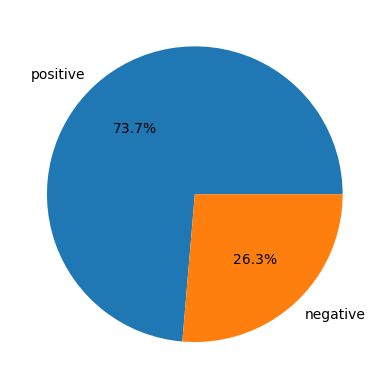

In [21]:
plt.pie(df['Rating'].value_counts(),labels=df['Rating'].unique().tolist(),autopct='%1.1f%%')
plt.show()

In [23]:
length=len(df['Review'][0])
print(f'Length of a sample review:{length}')

Length of a sample review:593


In [25]:
df['Length']=df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,positive,593
1,ok nothing special charge diamond member hilto...,negative,1689
2,nice rooms not 4* experience hotel monaco seat...,negative,1427
3,"unique, great stay, wonderful time hotel monac...",positive,600
4,"great stay great stay, went seahawk game aweso...",positive,1281


In [27]:
word_count=df['Review'][0].split()
print(f'word count in a sample review:{len(word_count)}')

word count in a sample review:87


In [29]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [31]:
df['word_count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,word_count
0,nice hotel expensive parking got good deal sta...,positive,593,87
1,ok nothing special charge diamond member hilto...,negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",positive,600,89
4,"great stay great stay, went seahawk game aweso...",positive,1281,191


In [53]:
from nltk.corpus import stopwords

def clean(review):
    import re
    review = review.lower()
    review = re.sub('[^a-zA-Z0-9-]+', ' ', review)  # Fix regex to avoid unnecessary spaces
    stop_words = set(stopwords.words('english'))  # Correct way to access stopwords
    review = " ".join([word for word in review.split() if word not in stop_words])
    return review


In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\VENKAT
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
df['Review'] = df['Review'].apply(clean)
df.head()


,Review,Rating,Length,word_count
0,nice hotel expensive parking got good deal sta...,positive,593,87
1,ok nothing special charge diamond member hilto...,negative,1689,250
2,nice rooms 4 experience hotel monaco seattle g...,negative,1427,217
3,unique great stay wonderful time hotel monaco ...,positive,600,89
4,great stay great stay went seahawk game awesom...,positive,1281,191


In [63]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [65]:
def corpus(text):
    text_list=text.split()
    return text_list

In [67]:
df['Review_lists']=df['Review'].apply(corpus)
df.head()

,Review,Rating,Length,word_count,Review_lists
0,nice hotel expensive parking got good deal sta...,positive,593,87,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,negative,1689,250,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,negative,1427,217,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,positive,600,89,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,positive,1281,191,"[great, stay, great, stay, went, seahawk, game..."


In [73]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
    corpus+=df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 90176.00it/s]


2080892

In [77]:
from collections import Counter
mostCommon=Counter(corpus).most_common(10)
mostCommon

[('hotel', 49762),
 ('room', 35043),
 ('great', 21425),
 ('n', 19098),
 ('good', 17330),
 ('staff', 16608),
 ('stay', 15385),
 ('nice', 12612),
 ('rooms', 12365),
 ('location', 11294)]

In [79]:
words=[]
freq=[]
for word,count in mostCommon:
    words.append(word)
    freq.append(count)

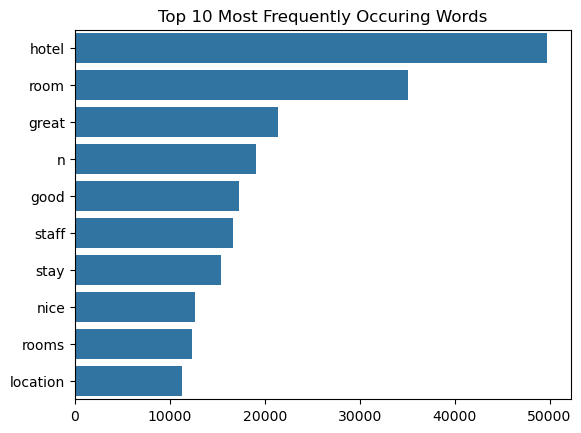

In [81]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['Review'])

In [93]:
count_values=bigrams.toarray().sum(axis=0)
ngram_freq=pd.DataFrame(sorted([(count_values[i],k)for k,i in cv.vocabulary_.items()],reverse=True))
ngram_freq.columns=["frequency","ngram"]

MemoryError: Unable to allocate 146. GiB for an array with shape (20491, 959090) and data type int64

In [1]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer()
sparse_matrix = count_vect.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

NameError: name 'documents' is not defined

In [9]:
# Define the documents

doc_trump = """Mr. Trump became president after winning the political election. 
Though he lost the support of some republican friends, Trump is friends with President Putin."""

doc_election = """President Trump says Putin had no political interference in the election outcome. 
He says it was a witchhunt by political parties. 
He claimed President Putin is a friend who had nothing to do with the election."""

doc_putin = """Post elections, Vladimir Putin became President of Russia. 
President Putin had served as the Prime Minister earlier in his political career."""

# Combine all documents into a list
documents = [doc_trump, doc_election, doc_putin]


In [11]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer()
sparse_matrix = count_vect.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,...,the,though,to,trump,vladimir,was,who,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,...,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,...,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.5        0.38890873]
 [0.5        1.         0.42426407]
 [0.38890873 0.42426407 1.        ]]


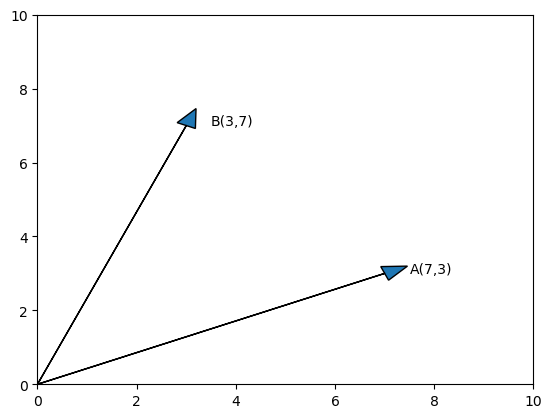

In [15]:
import numpy as np

import matplotlib.pyplot as plt

# consider two vectors A and B in 2-D

A = np.array([7,3])

B = np.array([3,7])

ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)

plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))

ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)

plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))

plt.xlim(0,10)

plt.ylim(0,10)

plt.show()

plt.close()

In [17]:
# cosine similarity between A and B

cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

print (f"Cosine Similarity between A and B:{cos_sim}")

print (f"Cosine Distance between A and B:{1-cos_sim}")

Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [9]:
A={1,2,3,4,6}
B={1,2,5,8,9}
C=A.intersection(B)
D=A.union(B)
print('AnB =',C)
print('AUB =',D)
print('J(A,B)=',float(len(C))/float(len(D)))

AnB = {1, 2}
AUB = {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B)= 0.25


In [11]:
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))     
    return intersection / union
set_a = {"Language", "for", "Computer", "NLP", "Science"}
set_b = {"NLP", "for", "Language", "Data", 'ML', "AI"}
similarity = jaccard_similarity(set_a, set_b)
print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.375


In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# Step 1: Define predefined chatbot responses
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."
]

In [17]:
# Step 2: Sample user input (this would come from a user in a real chatbot)
user_input = "How can I track my order?"

In [19]:
# Step 3: Preprocess the text using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')  # Removing stopwords like 'the', 'is', etc.
all_texts = responses + [user_input]  # Combine responses with the user input for vectorization

In [21]:
# Step 4: Convert the text to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [23]:
# Step 5: Compute cosine similarity between the user input and all responses
user_vector = tfidf_matrix[-1]  # The user input is the last text in the matrix
response_vectors = tfidf_matrix[:-1]  # All predefined responses
# Calculate cosine similarities
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [25]:
# Step 6: Find the most similar response
most_similar_idx = np.argmax(cosine_similarities)  # Find the index of the most similar response

In [27]:
# Step 7: Display the most relevant response
print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

User Query: How can I track my order?
Most relevant response: To track your order, you can visit the 'Order Tracking' page and enter your order number.


In [1]:
import io
import random
import string # to process standard python strings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer

In [8]:
#!pip install nltk
import nltk
nltk.download('popular', quiet=True) # for downloading packages
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only

[nltk_data] Downloading package punkt to C:\Users\VENKAT
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\VENKAT
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
f=open('input.txt','r',errors = 'ignore')
raw = f.read()
raw = raw.lower()# converts to lowercase

In [10]:
import nltk
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [11]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [16]:
GREETING_INPUTS = ("hello", "hi", "greetings", "what's up","hey",\
                   "how are you?")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", \
                      "I am glad! You are talking to me", \
                      "I am fine! How about you?"]
def greeting(sentence): 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [18]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you."
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [ ]:
flag=True
print("SABot: My name is SABot. How can I assist you?. \
If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("SABot: You are welcome...")
        else:
            if(greeting(user_response)!=None):
                print("SABot: "+greeting(user_response))
            else:
                print("SABot: ",end=" ")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("SABot: Bye! take care...")

SABot: My name is SABot. How can I assist you?. If you want to exit, type Bye!
